In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [5]:
cities

['havre',
 'ostrovnoy',
 'elk grove',
 'hermanus',
 'padang',
 'saint-paul',
 'richmond',
 'tibiri',
 'kasganj',
 'rio cauto',
 'cabedelo',
 'klaksvik',
 'cape town',
 'kota kinabalu',
 'kaeo',
 'vao',
 'mar del plata',
 'thompson',
 'kochevo',
 'illoqqortoormiut',
 'jamestown',
 'denpasar',
 'nam som',
 'kapaa',
 'rikitea',
 'new norfolk',
 'ancud',
 'cairo',
 'punta arenas',
 'santiago del estero',
 'port-gentil',
 'moyale',
 'taolanaro',
 'falealupo',
 'chokurdakh',
 'barrow',
 'mataura',
 'baghmara',
 'barentsburg',
 'vaini',
 'saint-philippe',
 'tynda',
 'kajaani',
 'bethel',
 'torbay',
 'juneau',
 'formosa',
 'codrington',
 'sao filipe',
 'hilo',
 'namibe',
 'atuona',
 'tambura',
 'alta floresta',
 'ballina',
 'belaya gora',
 'batagay-alyta',
 'yining',
 'amderma',
 'khatanga',
 'escanaba',
 'albany',
 'busselton',
 'bredasdorp',
 'manavalakurichi',
 'silopi',
 'mumford',
 'san cristobal',
 'riyadh',
 'puerto escondido',
 'kodiak',
 'menongue',
 'grindavik',
 'qui nhon',
 'zhanao

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | havre
Processing Record 2 of Set 1 | ostrovnoy
Processing Record 3 of Set 1 | elk grove
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | saint-paul
Processing Record 7 of Set 1 | richmond
Processing Record 8 of Set 1 | tibiri
Processing Record 9 of Set 1 | kasganj
Processing Record 10 of Set 1 | rio cauto
Processing Record 11 of Set 1 | cabedelo
Processing Record 12 of Set 1 | klaksvik
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | kota kinabalu
Processing Record 15 of Set 1 | kaeo
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | kochevo
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | denpasar
Processing R

Processing Record 39 of Set 4 | belyy yar
Processing Record 40 of Set 4 | amot
Processing Record 41 of Set 4 | lake cowichan
Processing Record 42 of Set 4 | vostok
Processing Record 43 of Set 4 | champawat
Processing Record 44 of Set 4 | skjervoy
Processing Record 45 of Set 4 | fukue
Processing Record 46 of Set 4 | vernon
Processing Record 47 of Set 4 | ketchikan
Processing Record 48 of Set 4 | khunti
Processing Record 49 of Set 4 | kruisfontein
Processing Record 50 of Set 4 | paradwip
City not found. Skipping...
Processing Record 1 of Set 5 | plettenberg bay
Processing Record 2 of Set 5 | narsaq
Processing Record 3 of Set 5 | praia da vitoria
Processing Record 4 of Set 5 | faanui
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | kotri
Processing Record 7 of Set 5 | maragogi
Processing Record 8 of Set 5 | byron bay
Processing Record 9 of Set 5 | iraucuba
Processing Record 10 of Set 5 | faya
Processing Record 11 of Set 5 | lahad datu
Processing Record 12 of Set 5 | b

Processing Record 28 of Set 8 | boralday
Processing Record 29 of Set 8 | serowe
Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | pahrump
Processing Record 32 of Set 8 | saint george
Processing Record 33 of Set 8 | cam ranh
Processing Record 34 of Set 8 | luderitz
Processing Record 35 of Set 8 | canyon
Processing Record 36 of Set 8 | lagoa
Processing Record 37 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 38 of Set 8 | sauda
Processing Record 39 of Set 8 | pailon
Processing Record 40 of Set 8 | humberto de campos
Processing Record 41 of Set 8 | rio gallegos
Processing Record 42 of Set 8 | ust-kuyga
Processing Record 43 of Set 8 | nabire
Processing Record 44 of Set 8 | makrikapa
City not found. Skipping...
Processing Record 45 of Set 8 | uncia
Processing Record 46 of Set 8 | chamba
Processing Record 47 of Set 8 | mareeba
Processing Record 48 of Set 8 | jacmel
Processing Record 49 of Set 8 | beloha
Processing Record 50 of Set 8 | la libertad
Pro

Processing Record 18 of Set 12 | aklavik
Processing Record 19 of Set 12 | grootfontein
Processing Record 20 of Set 12 | dunedin
Processing Record 21 of Set 12 | victoria
Processing Record 22 of Set 12 | lasa
Processing Record 23 of Set 12 | savino
Processing Record 24 of Set 12 | uyskoye
Processing Record 25 of Set 12 | akom
Processing Record 26 of Set 12 | magadan
Processing Record 27 of Set 12 | kirovskiy
Processing Record 28 of Set 12 | batsfjord
Processing Record 29 of Set 12 | changli
Processing Record 30 of Set 12 | tautira
Processing Record 31 of Set 12 | zhitikara
City not found. Skipping...
Processing Record 32 of Set 12 | calabozo
Processing Record 33 of Set 12 | cartagena del chaira
Processing Record 34 of Set 12 | kollam
Processing Record 35 of Set 12 | bongandanga
Processing Record 36 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 12 | karratha
Processing Record 38 of Set 12 | san vicente
Processing Record 39 of Set 12 | grand is

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Havre,49.5833,0.3333,49.77,81,0,4.61,FR,2022-05-13 22:31:51
1,Ostrovnoy,68.0531,39.5131,38.84,92,100,6.98,RU,2022-05-13 22:31:51
2,Elk Grove,38.4088,-121.3716,83.89,31,0,9.22,US,2022-05-13 22:29:57
3,Hermanus,-34.4187,19.2345,57.79,74,49,8.05,ZA,2022-05-13 22:31:52
4,Padang,-0.9492,100.3543,76.30,79,74,4.32,ID,2022-05-13 22:31:52
5,Saint-Paul,-21.0096,55.2707,69.91,67,6,4.07,RE,2022-05-13 22:31:53
6,Richmond,37.5538,-77.4603,73.44,77,75,10.36,US,2022-05-13 22:30:55
7,Tibiri,13.5627,7.0485,90.61,12,5,10.13,NE,2022-05-13 22:31:54
8,Kasganj,27.8167,78.6500,87.78,25,0,6.53,IN,2022-05-13 22:31:54
9,Rio Cauto,20.5603,-76.9161,80.69,62,100,4.45,CU,2022-05-13 22:31:54


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Havre,FR,2022-05-13 22:31:51,49.5833,0.3333,49.77,81,0,4.61
1,Ostrovnoy,RU,2022-05-13 22:31:51,68.0531,39.5131,38.84,92,100,6.98
2,Elk Grove,US,2022-05-13 22:29:57,38.4088,-121.3716,83.89,31,0,9.22
3,Hermanus,ZA,2022-05-13 22:31:52,-34.4187,19.2345,57.79,74,49,8.05
4,Padang,ID,2022-05-13 22:31:52,-0.9492,100.3543,76.30,79,74,4.32
...,...,...,...,...,...,...,...,...,...
579,Sorong,ID,2022-05-13 22:48:41,-0.8833,131.2500,78.13,91,100,4.74
580,Alofi,NU,2022-05-13 22:48:42,-19.0595,-169.9187,78.69,53,100,12.66
581,Puerto Carreno,CO,2022-05-13 22:48:42,6.1890,-67.4859,84.18,79,100,3.44
582,Haines Junction,CA,2022-05-13 22:48:43,60.7522,-137.5108,41.67,60,100,6.38


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

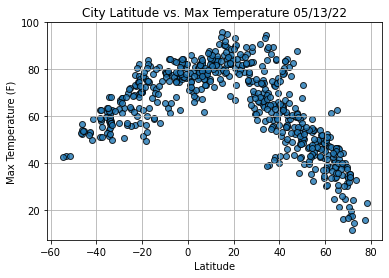

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

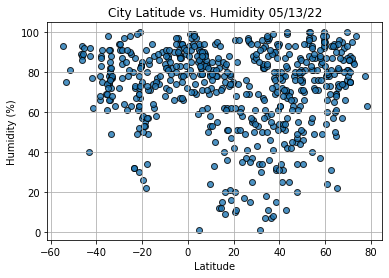

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

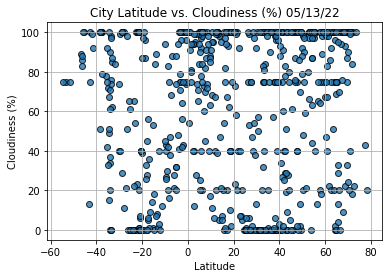

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

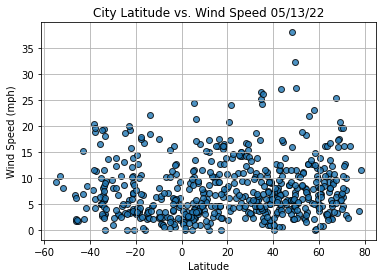

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

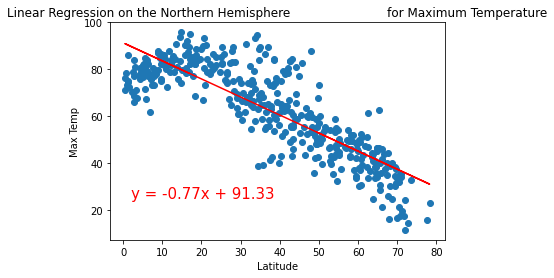

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(2,25))

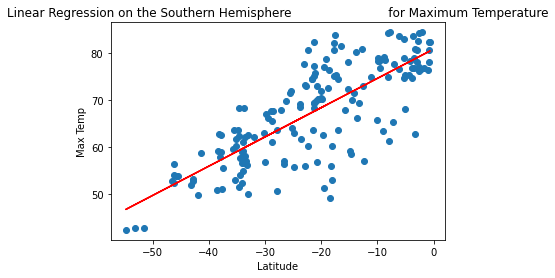

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

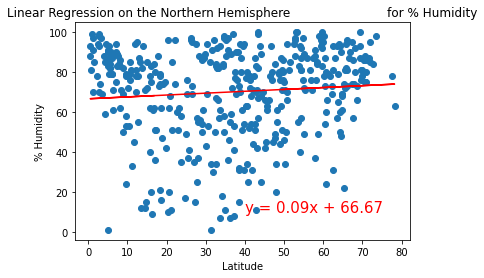

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

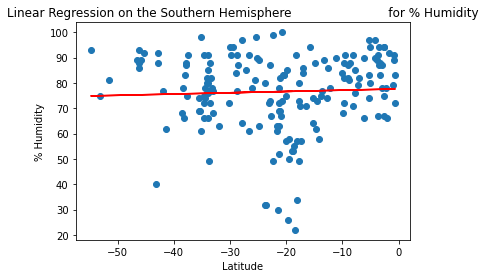

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

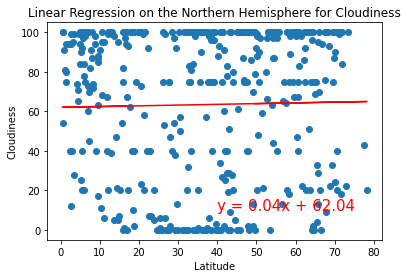

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudiness', 'Cloudiness',(40,10))

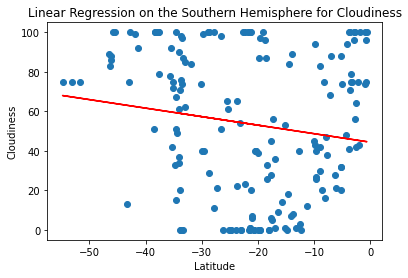

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudiness', 'Cloudiness',(40,10))

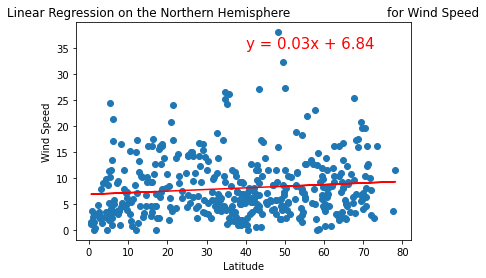

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

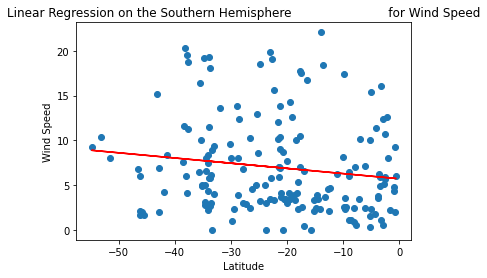

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [28]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [29]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Havre,FR,2022-05-13 22:31:51,49.5833,0.3333,49.77,81,0,4.61
1,1,Ostrovnoy,RU,2022-05-13 22:31:51,68.0531,39.5131,38.84,92,100,6.98
2,2,Elk Grove,US,2022-05-13 22:29:57,38.4088,-121.3716,83.89,31,0,9.22
3,3,Hermanus,ZA,2022-05-13 22:31:52,-34.4187,19.2345,57.79,74,49,8.05
4,4,Padang,ID,2022-05-13 22:31:52,-0.9492,100.3543,76.30,79,74,4.32


In [30]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)
import ipywidgets as widgets
%matplotlib inline


In [32]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [37]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of percent clouds
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
# Heatmap of wind
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [44]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Elk Grove,US,2022-05-13 22:29:57,38.4088,-121.3716,83.89,31,0,9.22
4,4,Padang,ID,2022-05-13 22:31:52,-0.9492,100.3543,76.30,79,74,4.32
8,8,Kasganj,IN,2022-05-13 22:31:54,27.8167,78.6500,87.78,25,0,6.53
9,9,Rio Cauto,CU,2022-05-13 22:31:54,20.5603,-76.9161,80.69,62,100,4.45
10,10,Cabedelo,BR,2022-05-13 22:31:55,-6.9811,-34.8339,77.67,82,88,10.18
13,13,Kota Kinabalu,MY,2022-05-13 22:31:56,5.9749,116.0724,78.78,89,20,2.30
19,19,Jamestown,US,2022-05-13 22:30:27,42.0970,-79.2353,78.44,44,40,8.05
20,20,Denpasar,ID,2022-05-13 22:31:59,-8.6500,115.2167,78.46,88,20,1.14
21,21,Nam Som,TH,2022-05-13 22:31:59,17.7704,102.1895,77.18,88,62,2.37
22,22,Kapaa,US,2022-05-13 22:32:00,22.0752,-159.3190,82.38,74,40,13.80


In [45]:
preferred_cities_df.count()

City_ID       192
City          192
Country       192
Date          192
Lat           192
Lng           192
Max Temp      192
Humidity      192
Cloudiness    192
Wind Speed    192
dtype: int64

In [46]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Elk Grove,US,83.89,38.4088,-121.3716,
4,Padang,ID,76.30,-0.9492,100.3543,
8,Kasganj,IN,87.78,27.8167,78.6500,
9,Rio Cauto,CU,80.69,20.5603,-76.9161,
10,Cabedelo,BR,77.67,-6.9811,-34.8339,
13,Kota Kinabalu,MY,78.78,5.9749,116.0724,
19,Jamestown,US,78.44,42.0970,-79.2353,
20,Denpasar,ID,78.46,-8.6500,115.2167,
21,Nam Som,TH,77.18,17.7704,102.1895,
22,Kapaa,US,82.38,22.0752,-159.3190,


In [ ]:
hotelurl = https://maps.googleapis.com/maps/api/place/nearbysearch/json
    # Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}